In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
import os
import pathlib
import random

In [2]:
base_path = r"C:\Users\salon\Desktop\MSC DS & BDA\Breast-Cancer-Detection-Using-CNN-on-Ultrasound-Images-main\Dataset_Images"

In [3]:
# Paths to the individual image folders
benign_path = os.path.join(base_path, 'benign')
malignant_path = os.path.join(base_path, 'malignant')
normal_path = os.path.join(base_path, 'normal')

In [4]:
from pathlib import Path

# Convert the path strings to Path objects
benign_path = Path(benign_path)
malignant_path = Path(malignant_path)
normal_path = Path(normal_path)

# Count the number of PNG files in each directory
benignImageCount = len(list(benign_path.glob('*.png')))
malignantImageCount = len(list(malignant_path.glob('*.png')))
normalImageCount = len(list(normal_path.glob('*.png')))
totalImageCount = benignImageCount + malignantImageCount + normalImageCount

In [5]:
print("Total number of Images:", totalImageCount)
print("No.of Benign (non-dangerous) Images: {}({})".format(benignImageCount, round(benignImageCount*100/totalImageCount, 2)))
print("No.of Malignant (dangerous) Images: {}({})".format(malignantImageCount, round(malignantImageCount*100/totalImageCount, 2)))
print("No.of Normal (No Traces) Images: {}({})".format(normalImageCount, round(normalImageCount*100/totalImageCount, 2)))

Total number of Images: 1587
No.of Benign (non-dangerous) Images: 900(56.71)
No.of Malignant (dangerous) Images: 421(26.53)
No.of Normal (No Traces) Images: 266(16.76)


In [6]:
#Build the Cnn
batch_size = 100
img_height = 224
img_width = 224

In [7]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data = image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_data = image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1587 files belonging to 3 classes.
Using 1270 files for training.
Found 1587 files belonging to 3 classes.
Using 317 files for validation.


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create an image data generator for augmentation
from tensorflow.keras.applications import VGG16

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)




In [9]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers in the base model
base_model.trainable = False

In [10]:
# Create a new model on top of the pre-trained base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [11]:
# Compile the model 
epochs = 5
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using TensorFlow Datasets
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=test_data,
    verbose=1
)

# Evaluate the model on validation data
loss, accuracy = model.evaluate(test_data)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 379s 28s/step - accuracy: 0.5164 - loss: 2.8334 - val_accuracy: 0.7539 - val_loss: 0.9474
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 349s 27s/step - accuracy: 0.7489 - loss: 0.8681 - val_accuracy: 0.8044 - val_loss: 0.4454
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 339s 26s/step - accuracy: 0.7981 - loss: 0.5454 - val_accuracy: 0.8360 - val_loss: 0.4032
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 343s 26s/step - accuracy: 0.8171 - loss: 0.4194 - val_accuracy: 0.8423 - val_loss: 0.3497
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 355s 28s/step - accuracy: 0.8540 - loss: 0.3644 - val_accuracy: 0.8517 - val_loss: 0.3359
4/4 ━━━━━━━━━━━━━━━━━━━━ 66s 14s/step - accuracy: 0.8504 - loss: 0.3618
Test Loss: 0.3685309588909149
Test Accuracy: 0.85173499584198


In [12]:
#keys
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [13]:
#accuracy vs lost
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

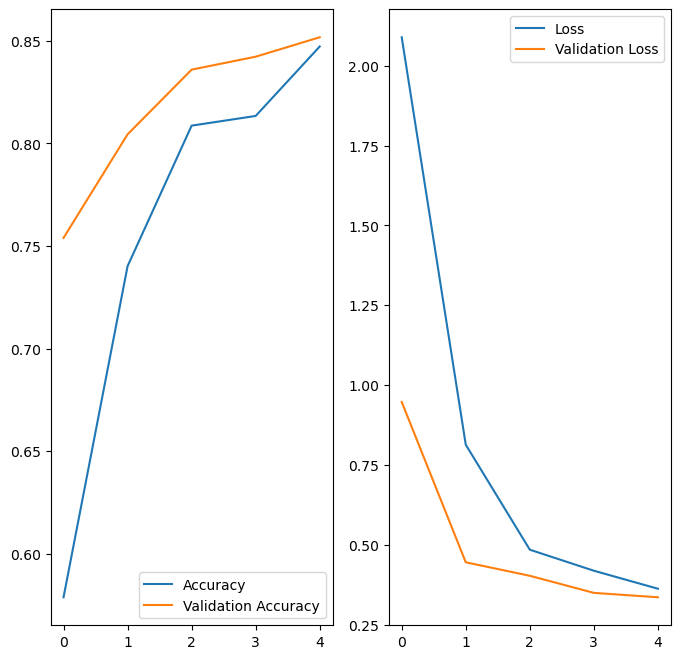

In [14]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [15]:
model.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 72s 14s/step - accuracy: 0.8547 - loss: 0.3264


[0.30848726630210876, 0.85173499584198]

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,912,843 (56.89 MB)

 Trainable params: 66,051 (258.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 132,104 (516.04 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


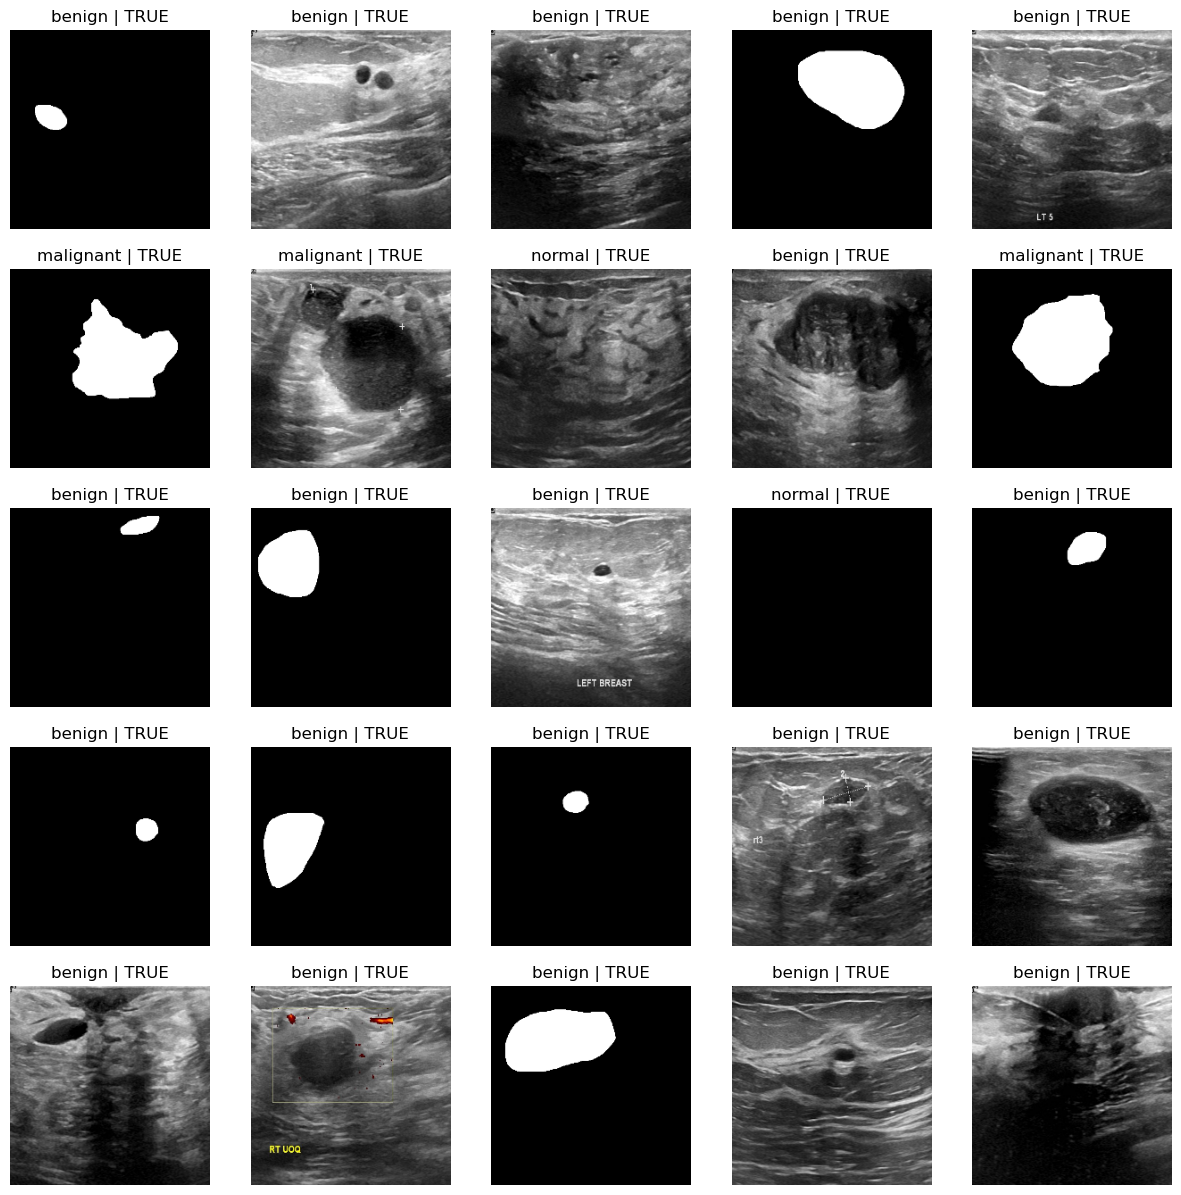

In [17]:
plt.figure(figsize=(15, 15))
class_names = test_data.class_names
result = ' | False'
for images, labels in test_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result)
        plt.axis("off")

In [18]:
# Evaluate the model on validation data
loss, accuracy = model.evaluate(test_data)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 74s 16s/step - accuracy: 0.8487 - loss: 0.3526
Test Loss: 0.34643545746803284
Test Accuracy: 0.85173499584198


In [19]:
# Save the model
model.save("breastcancer_detection_model.h5")

ValueError: Unable to synchronously create dataset (name already exists)

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
# Make predictions on the test data
predictions = []
true_labels = []
for images, labels in test_data:
    batch_predictions = model.predict(images)
    batch_predictions = np.argmax(batch_predictions, axis=1)
    predictions.extend(batch_predictions)
    true_labels.extend(labels.numpy())

4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [22]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions, normalize='true')

<Figure size 400x400 with 0 Axes>

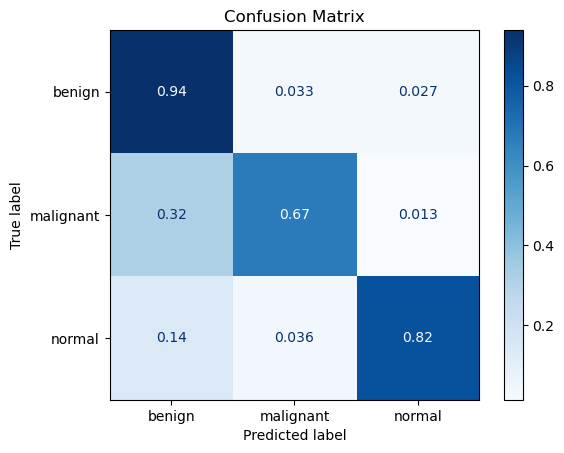

In [23]:
# Plot the confusion matrix
plt.figure(figsize=(4, 4))
ConfusionMatrixDisplay(conf_matrix, display_labels=test_data.class_names).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

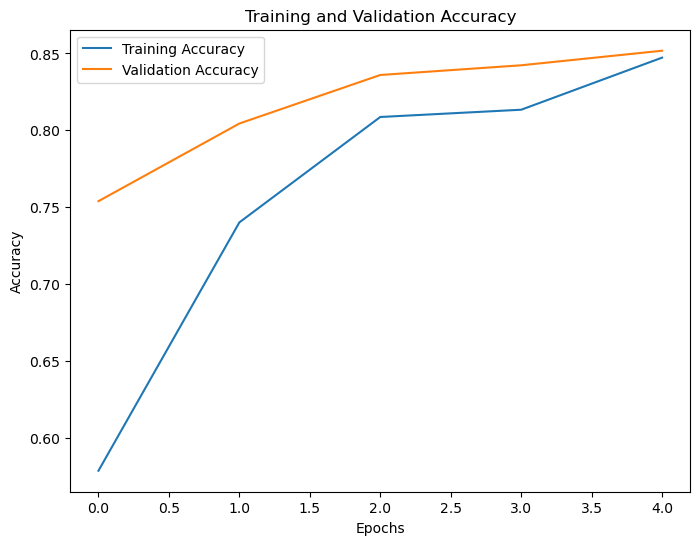

In [24]:
# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [26]:
# Get predictions for test data
predictions = []
true_labels = []
for images, labels in test_data:
    predictions.extend(np.argmax(model.predict(images), axis=1))
    true_labels.extend(labels.numpy())

4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [27]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)

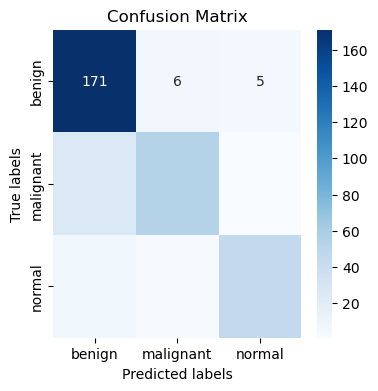

In [28]:
# Plot Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=test_data.class_names, yticklabels=test_data.class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

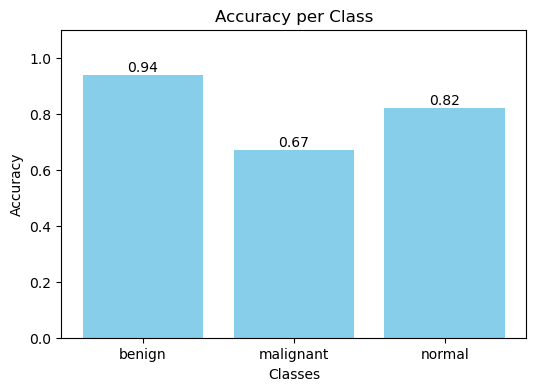

In [29]:
# Accuracy Bar Graph
accuracy_per_class = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(6, 4))
bars = plt.bar(test_data.class_names, accuracy_per_class, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')
plt.ylim(0, 1.1)  # Set y-axis limit to ensure all values are visible

# Add values to each bar
for bar, acc in zip(bars, accuracy_per_class):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.2f}', 
             ha='center', va='bottom')

plt.show()

In [45]:
# Get one image path from each class
normal_image_path = os.path.join(normal_path, os.listdir(normal_path)[0])
benign_image_path = os.path.join(benign_path, os.listdir(benign_path)[0])
malignant_image_path = os.path.join(malignant_path, os.listdir(malignant_path)[0])

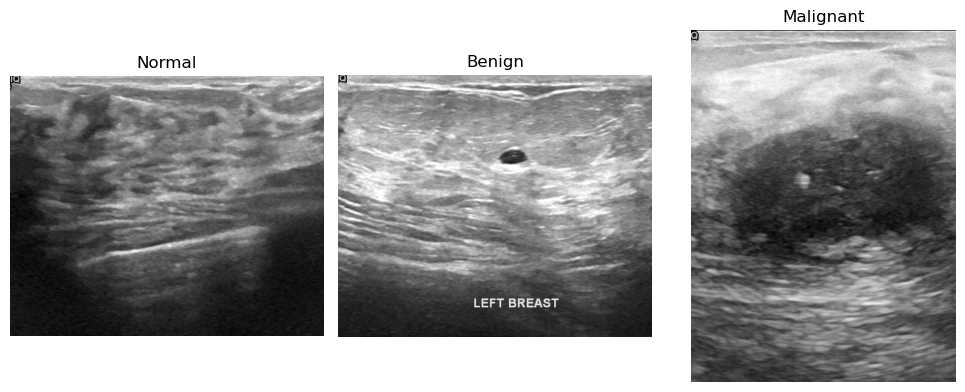

In [46]:
# Load and display images
plt.figure(figsize=(10, 4))

# Normal image
plt.subplot(1, 3, 1)
normal_image = plt.imread(normal_image_path)
plt.imshow(normal_image)
plt.title("Normal")
plt.axis("off")

# Benign image
plt.subplot(1, 3, 2)
benign_image = plt.imread(benign_image_path)
plt.imshow(benign_image)
plt.title("Benign")
plt.axis("off")

# Malignant image
plt.subplot(1, 3, 3)
malignant_image = plt.imread(malignant_image_path)
plt.imshow(malignant_image)
plt.title("Malignant")
plt.axis("off")

plt.tight_layout()
plt.show()